In [2]:
import h5py
import pandas as pd 
import matplotlib.pyplot as plt


f = h5py.File("raw_data/X_test.h5/X_test.h5","r")

In [3]:
f.items



<bound method MappingHDF5.items of <HDF5 file "X_test.h5" (mode r)>>

In [4]:
df = pd.DataFrame([[0,1,2],[4,5,6]])

In [5]:
attr = list(f.keys())

In [6]:
f['index_window'][:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [30]:
y_train = pd.read_csv('raw_data/y_train.csv')
sample_sub = pd.read_csv('raw_data/sample_submission.csv')

In [32]:
y_train["index"]
sample_sub["index"]

0        24688
1        24689
2        24690
3        24691
4        24692
         ...  
24975    49663
24976    49664
24977    49665
24978    49666
24979    49667
Name: index, Length: 24980, dtype: int64

In [51]:
f['eeg_1'].shape

(24980, 1500)

In [58]:
import numpy as np
def windows_split(X_data):
    n = len(X_data)
    return np.array([X_data[i*100:100*(i+1)] for i in range(n//100)])
split = windows_split(f['eeg_1'][1234])

In [76]:
def MMD(data_array):
    n_pts = len(data_array)
    min_val = data_array[0]
    max_val = data_array[0]
    min_index = 0
    max_index = 0
    for i in range(n_pts):
        if data_array[i]<min_val:
            min_val = data_array[min_index]
            min_index = i
        if data_array[i]>max_val:
            max_val = data_array[max_index]
            min_index = i
        
    d = np.sqrt((max_index-min_index)**2 + (max_val-min_val)**2)
    return d


def MMD_epoch(data_epoch):
    return sum([MMD(split) for split in windows_split(data_epoch)])



In [78]:
MMD_epoch(f['eeg_1'][1234])

1487.9335332057997

In [220]:
epoch_sample = f['eeg_1'][12344]
fft = np.fft.fft(np.array(epoch_sample))

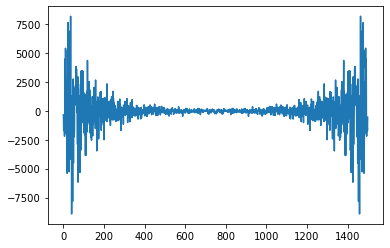

In [221]:
plt.plot(fft)

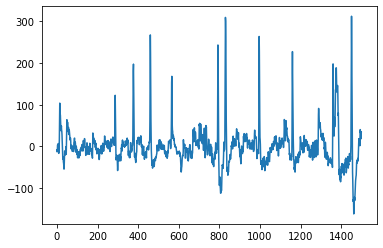

In [222]:
plt.plot(epoch_sample)

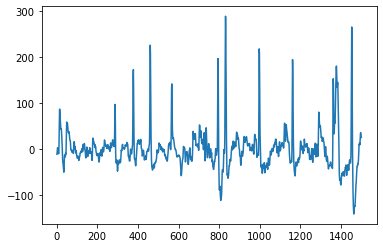

In [223]:
smooth = pd.DataFrame(epoch_sample).rolling(3).mean()
plt.plot(smooth)

In [224]:
smooth

,0
0,NaN
1,NaN
2,-11.147211
3,-7.439286
4,-1.593290
...,...
1495,34.315588
1496,36.087468
1497,30.648062
1498,25.996311


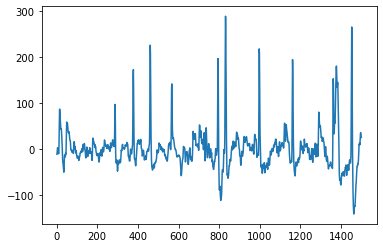

In [225]:
plt.plot(np.fft.fft(smooth))

In [156]:
n = 10000
mmd_epochs = [[MMD_epoch(eeg_epoch) for eeg_epoch in f['eeg_'+str(i)][:n]] for i in range(1,8)]
mmd_epochs.append([MMD_epoch(pos_epoch) for pos_epoch in f['x'][:n]])
mmd_epochs.append([MMD_epoch(pos_epoch) for pos_epoch in f['y'][:n]])
mmd_epochs.append([MMD_epoch(pos_epoch) for pos_epoch in f['z'][:n]])
mmd_epochs.append([MMD_epoch(pos_epoch) for pos_epoch in f['pulse'][:n]])
# mmd_x1 = [MMD_epoch(eeg_epoch) for eeg_epoch in f['eeg_1'][:n]]
# mmd_x2 = [MMD_epoch(eeg_epoch) for eeg_epoch in f['eeg_2'][:n]]
# mmd_x3 = [MMD_epoch(eeg_epoch) for eeg_epoch in f['eeg_3'][:n]]
# mmd_x4 = [MMD_epoch(eeg_epoch) for eeg_epoch in f['eeg_4'][:n]]
# mmd_x1 = [MMD_epoch(eeg_epoch) for eeg_epoch in f['eeg_5'][:n]]
# mmd_x1 = [MMD_epoch(eeg_epoch) for eeg_epoch in f['eeg_6'][:n]]
# mmd_x1 = [MMD_epoch(eeg_epoch) for eeg_epoch in f['eeg_7'][:n]]


In [157]:
df_mmd = pd.DataFrame(mmd_epochs)

In [158]:
df_mmd.T
X=df_mmd.T

In [159]:
X


,0,1,2,3,4,5,6,7,8,9,10
0,3946.040978,8366.213684,38711.394373,1859.543999,39787.368942,45709.854746,37193.566065,242.000575,297.001628,284.000999,830536.559318
1,2057.841920,5516.009115,1511.849566,1730.004264,1991.008987,5545.113419,1464.405203,225.000896,251.002427,297.001354,1375.522715
2,2359.579686,5338.158121,1639.104670,1717.202066,2298.976889,5112.133902,1487.062438,294.000017,182.001043,295.001476,1172.534810
3,2560.093541,4898.809954,1558.366382,1532.529384,2498.687731,4932.943771,1469.108284,292.000147,295.004942,258.002709,1273.061406
4,1744.753880,1727.261782,1511.405197,1559.519972,1699.589671,1674.076063,1428.144676,194.001375,297.000005,297.000022,602.731063
...,...,...,...,...,...,...,...,...,...,...,...
9995,14749.412144,81893.643379,2511.730831,2888.530518,14484.478483,81339.399664,2000.795401,279.001979,281.000813,283.000160,1360.484508
9996,1555.749324,7966.935919,1427.237488,1441.121604,1583.579211,7887.163764,1334.385200,297.000003,297.000070,297.000044,2087.101455
9997,20728.516675,176695.148174,35383.024479,95262.373665,20155.618016,98411.842845,5098.550444,294.001055,291.001161,293.000090,1367.026448
9998,1976.420291,2672.542811,5718.072016,2596.103347,2117.857585,2163.133426,1545.269200,297.000142,291.005081,297.000200,1262.205155


In [160]:
y_train_vals = y_train["sleep_stage"].values

In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

n_train = 1000
model = RandomForestClassifier()
model.fit(X[:n-n_train],y_train_vals[:n-n_train])

model.score(X[-n_train:],y_train_vals[-n_train:]), model.score(X[:n-n_train],y_train_vals[:n-n_train])


(0.327, 1.0)

In [172]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

n_train = 1000

model.fit(X[:n-n_train],y_train_vals[:n-n_train])

model.score(X[-n_train:],y_train_vals[-n_train:]), model.score(X[:n-n_train],y_train_vals[:n-n_train])


(0.249, 1.0)

In [155]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X[:800],y_train_vals[:800],)

model.score(X[801:1000],y_train_vals[801:1000]), model.score(X[:800],y_train_vals[:800])

# f1_score(y_pred,y_train_vals[801:1000])

(0.35678391959798994, 1.0)